<a href="https://colab.research.google.com/github/fravona2211/Berliving/blob/master/BerLivingBerechnungen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
!pip install git+git://github.com/geopandas/geopandas.git
import geopandas as gpd
import seaborn as sns
sns.set(style="darkgrid")

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-0slakg27
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-0slakg27
  Created wheel for geopandas: filename=geopandas-0.8.0+10.g301418f-py2.py3-none-any.whl size=963666 sha256=f15ccc507c18cadd6f02cf14144cf36201e1fa5c340c6ba938f414fe1cb758da
  Stored in directory: /tmp/pip-ephem-wheel-cache-rbqkr3om/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas


# Calculations

In [ ]:
# Calculation: (every value / maximum) * ranking points
df = pd.read_csv('data_berliving.csv', index_col = 'Bezirke', delimiter=";")
df1 = df.iloc[2]
df2 = df.iloc[4:]
df2 = df2.astype(float)
df2_n=df2.iloc[:,[3,5,10]]

df2_min=df2_n.min(axis=0)
df2_min1 = df2_min.divide(df2_n)

# df3 = df2.iloc[:,0].astype(float)

In [ ]:
df3 = df2.divide(df2.max(axis=0))

In [ ]:
df3['Rental_Prices']=df2_min1['Rental_Prices']
df3['Crime_Rates_per_sq_km']=df2_min1['Crime_Rates_per_sq_km']
df3['Unemployment']=df2_min1['Unemployment']

In [ ]:
df4 = df3.multiply(df1)

In [ ]:
# neg_codiert = ['Crime_Rates_per_sq_km', 'Rental_Prices', 'Unemployment']
# df4[neg_codiert] = df4[neg_codiert]*(-1)
# df4.head()

In [ ]:
df4['overall_score'] = df4.sum(axis=1); df4

,Public_Transport _Stops_per_sq_km,Grocery_stores_per_sq _km,Green Spaces_per_sq_km,Rental_Prices,Number_of_restaurants_per_sq_km,Crime_Rates_per_sq_km,Cultural_Spaces_per_sq_km,Demographics_20_39,Sport_spaces per sp km,Physicians,Unemployment,Median_income,Tourism_attraction,Parking_space_per_sq_km,overall_score
Bezirke,,,,,,,,,,,,,,,
Charlottenburg- Wilmersdorf,12.063466,9.738676,6.907639,6.860870,2.636816,1.729870,4.702509,4.433333,4.675585,3.724771,2.551278,3.000000,0.267677,0.747108,64.039598
Friedrichshain- Kreuzberg,10.662327,12.229965,8.519221,6.676154,10.000000,0.450761,8.000000,7.000000,6.000000,5.000000,2.197011,2.833753,0.717172,0.383807,80.670171
Lichtenberg,10.639544,9.738676,10.849725,9.372570,1.492537,2.527514,3.784946,5.350000,4.354515,1.619266,2.725204,2.359362,0.040404,0.687171,65.541436
Marzahn- Hellersdorf,10.719284,7.020906,11.694458,11.000000,0.398010,3.514512,2.408602,4.333333,3.150502,1.204893,2.980370,2.222502,0.050505,1.000000,61.697878
Mitte,9.078926,5.299652,10.292561,6.467213,5.389718,0.622139,5.390681,6.533333,3.110368,4.195719,1.505096,2.706969,2.000000,0.233438,62.825813
NeukÃ¶lln,4.590724,7.247387,12.000000,8.627237,3.980100,1.371782,4.473118,5.500000,3.210702,1.918960,1.656168,2.397145,0.045455,0.396951,57.415728
Pankow,8.406835,8.017422,7.746380,7.933272,2.056385,3.741573,3.125448,5.316667,3.110368,1.737003,2.285512,2.819479,0.055556,0.350683,56.702584
Reinickendorf,8.543531,5.254355,6.578133,9.213376,0.563847,4.338762,1.433692,3.916667,1.846154,0.882263,3.161290,2.505458,0.030303,0.467928,48.735760
Spandau,1.401139,1.358885,6.650025,9.795711,0.165837,4.951673,0.344086,4.216667,0.341137,0.827217,2.607013,2.318220,0.020202,0.076761,35.074574


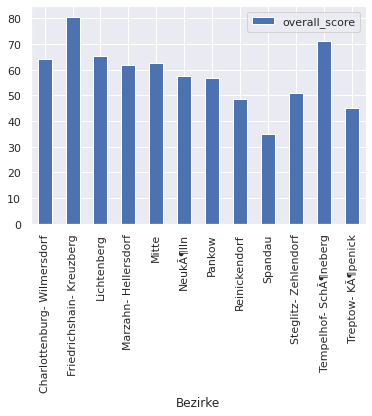

In [ ]:
df4.plot.bar(y='overall_score', use_index=True)


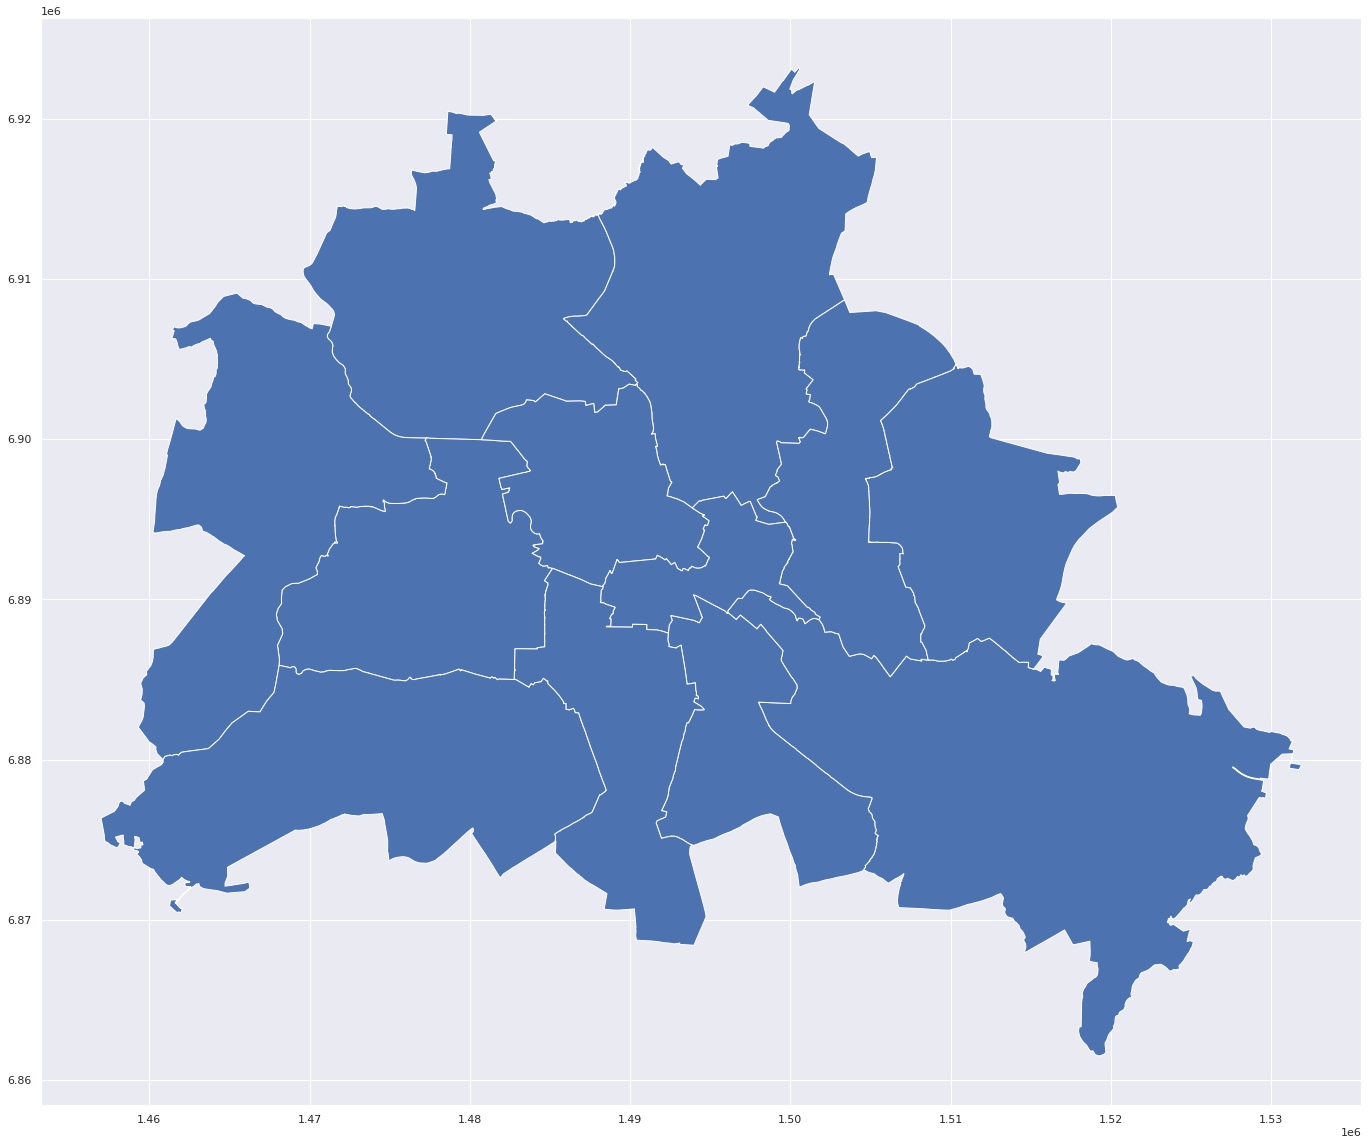

<Figure size 432x288 with 0 Axes>

In [ ]:
import geopandas as gdp
berlin_shape_file = 'Berlin_Bezirke.shp'
regions = gdp.read_file(berlin_shape_file)
regions.plot(figsize=(40,20))
plt.show()
plt.savefig('regions', bbox_inches='tight')

In [ ]:
regions.sample(5)

,FID,gml_id,Gemeinde_n,Gemeinde_s,Land_name,Land_schlu,Schluessel,SHAPE_Leng,SHAPE_Area,geometry
10,11,s_wfs_alkis_bezirk.F176__11,Friedrichshain-Kreuzberg,002,Berlin,11,11000002,53758.825032,5.496101e+07,"POLYGON ((1497836.047 6894932.561, 1497938.835..."
2,3,s_wfs_alkis_bezirk.F176__3,Treptow-Köpenick,009,Berlin,11,11000009,149810.619914,4.503972e+08,"POLYGON ((1511635.635 6871103.429, 1511600.785..."
9,10,s_wfs_alkis_bezirk.F176__10,Mitte,001,Berlin,11,11000001,58707.772351,1.062882e+08,"POLYGON ((1489144.389 6902186.863, 1489151.101..."
8,9,s_wfs_alkis_bezirk.F176__9,Steglitz-Zehlendorf,006,Berlin,11,11000006,103050.006867,2.754574e+08,"POLYGON ((1482722.688 6885007.485, 1482757.598..."
3,4,s_wfs_alkis_bezirk.F176__4,Pankow,003,Berlin,11,11000003,109210.896203,2.792661e+08,"MULTIPOLYGON (((1503348.346 6912941.540, 15033..."


In [ ]:
df10 = df4.iloc[:,-1]
df10 = df10.reset_index()
df10 = df10.rename(columns={'Bezirke': 'Gemeinde_n'})
merged = regions.set_index('Gemeinde_n').join(df10.set_index('Gemeinde_n'))
merged = merged.reset_index()
df10 = df10.replace(['NeukÃ¶lln'],'Neukölln')
df10 = df10.replace(['Tempelhof- SchÃ¶neberg'],'Tempelhof-Schöneberg')
df10 = df10.replace(['Treptow- KÃ¶penick'],'Treptow-Köpenick')
df10 = df10.replace(['Charlottenburg- Wilmersdorf'],'Charlottenburg-Wilmersdorf')
df10 = df10.replace(['Friedrichshain- Kreuzberg'],'Friedrichshain-Kreuzberg')
df10 = df10.replace(['Marzahn- Hellersdorf'],'Marzahn-Hellersdorf')
df10 = df10.replace(['Steglitz- Zehlendorf'],'Steglitz-Zehlendorf')
merged = regions.set_index('Gemeinde_n').join(df10.set_index('Gemeinde_n'))
merged = merged.reset_index()

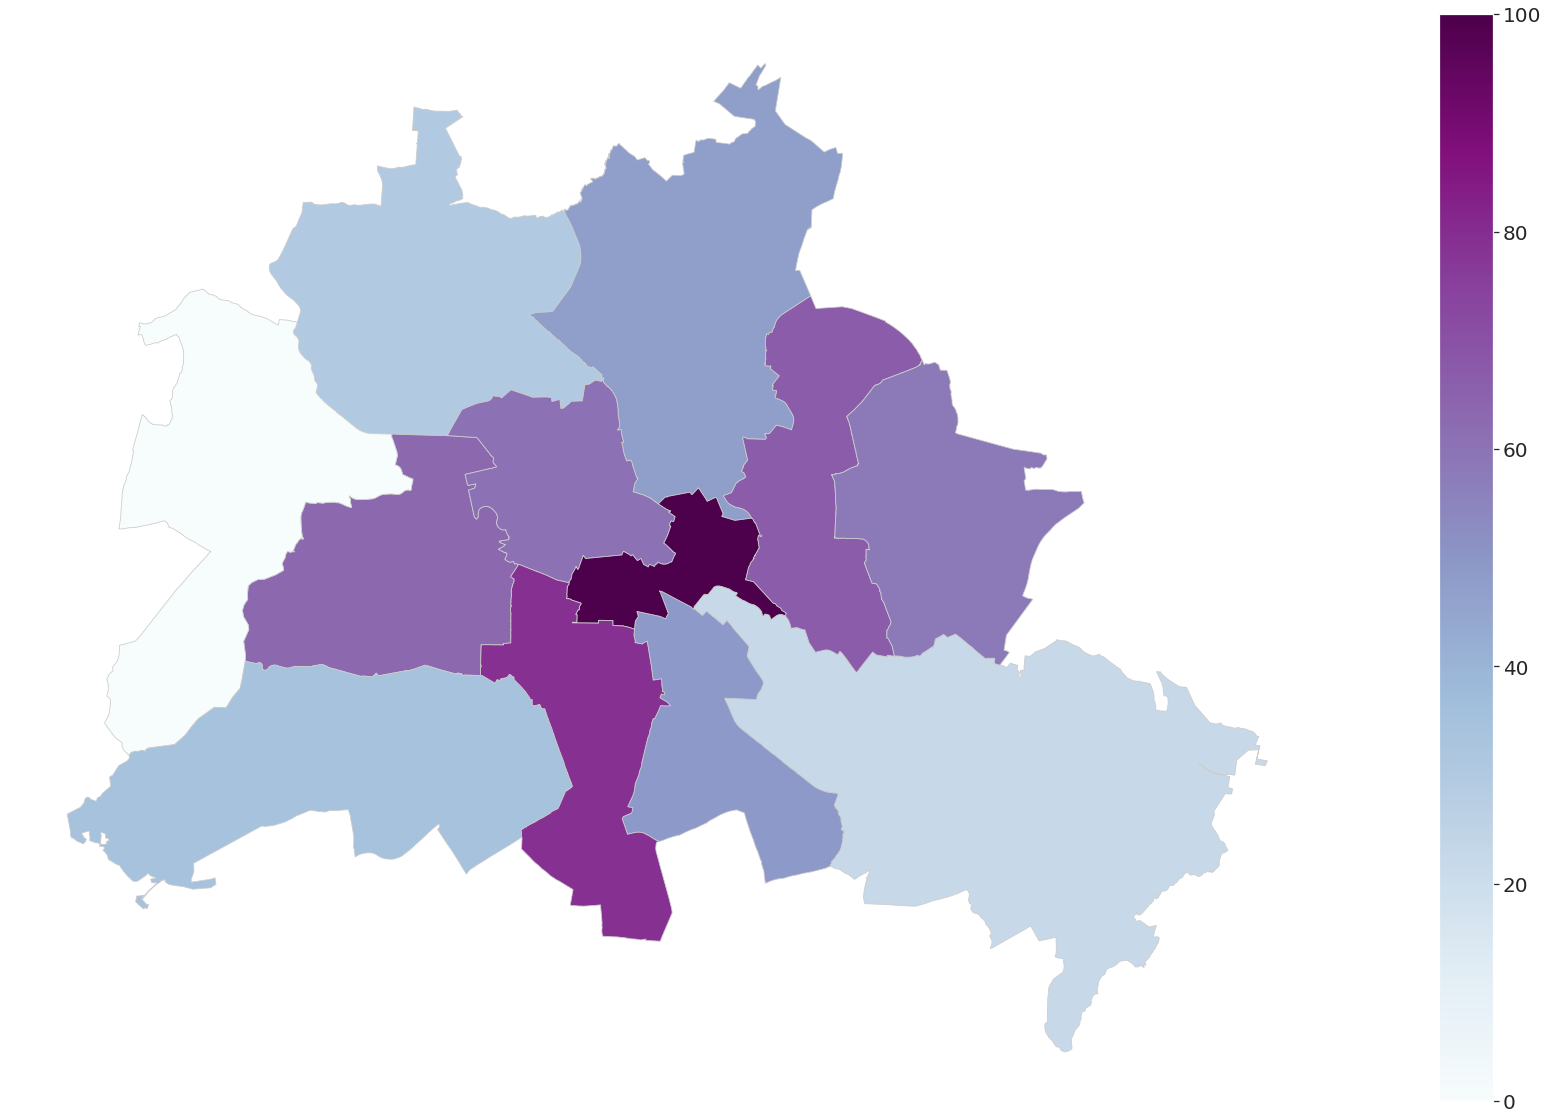

In [ ]:
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
#ax.set_title('Liveability in Berlin', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'BuPu'
vmin, vmax = 0, 100
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

merged.plot('overall_score', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
plt.savefig('Berliving.png', bbox_inches='tight')